In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
x = np.linspace(1e-1,1e4,100)
y = np.linspace

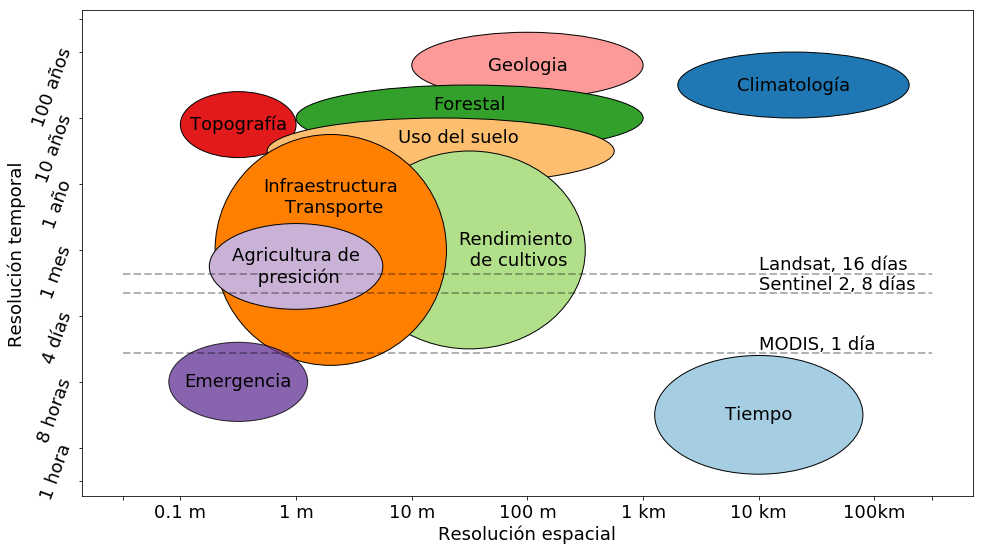

In [2]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.xticks([-1.5,-1,0,1,2,3,4,5,5.5],
           ["","0.1 m","1 m","10 m","100 m", "1 km", "10 km", "100km"])
plt.xlabel("Resolución espacial")
plt.yticks([-4.5,-4,-3,-2,-1,0,1,2,2.5],
           ["","1 hora", "8 horas", "4 días", "1 mes", "1 año", "10 años", "100 años"],rotation=70 )
plt.ylabel("Resolución temporal")

ax = plt.axes() 

ax.add_patch(patches.Ellipse((2,1.8),2,1, facecolor="#fb9a99",edgecolor="black"))
ax.annotate("Geologia",(2,1.8),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,1),3,1, facecolor="#33a02c",edgecolor="black"))
ax.annotate("Forestal",(1.5,1.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-0.5,0.9),1,1, facecolor="#e31a1c",edgecolor="black"))
ax.annotate("Topografía",(-0.5,0.9),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.25,0.5),3,1, facecolor="#fdbf6f",edgecolor="black"))
ax.annotate("Uso del suelo",(1.4,0.7),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,-1),2,3, facecolor="#b2df8a",edgecolor="black"))
ax.annotate("Rendimiento\n de cultivos",(1.9,-1),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0.3,-1),2,3.5, facecolor="#ff7f00",edgecolor="black"))
ax.annotate("Infraestructura\n Transporte",(0.3,-.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0,-1.25),1.5,1.3, facecolor="#cab2d6",edgecolor="black"))
ax.annotate("Agricultura de\n presición",(0,-1.25),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-.5,-3),1.2,1.2, facecolor="#6a3d9a",edgecolor="black",alpha=0.8))
ax.annotate("Emergencia",(-.5,-3),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4.3,1.5),2,1, facecolor="#1f78b4",edgecolor="black"))
ax.annotate("Climatología",(4.3,1.5),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4,-3.5),1.8,1.8, facecolor='#a6cee3',edgecolor="black"))
ax.annotate("Tiempo",(4,-3.5),horizontalalignment='center',
           verticalalignment='center')


points = np.linspace(-1.5,5.5)
y1 = np.log10(16/365)
ax.annotate("Landsat, 16 días",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)
ax.set_title('Line Type -')

y1 = np.log10(8/365)
ax.annotate("Sentinel 2, 8 días",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)
ax.set_title('Line Type -')

y1 = np.log10(1/365)
ax.annotate("MODIS, 1 día",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)

plt.tight_layout()
plt.savefig("fig:evst.png",dpi=300)
plt.show()

In [83]:
from scipy.interpolate import interp1d

wl = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt",skip_header=True)
refV = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF.txt",skip_header=True)
refS = np.genfromtxt("splib07a_Rangeland_C03-027_S27percent_G19percent_ASDFRa_AREF/splib07a_Rangeland_C03-027_S27%_G19%_ASDFRa_AREF.txt",skip_header=True)
refA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF.txt",skip_header=True)
wlA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Wavelengths_BECK_Beckman_0.2-3.0_microns.txt",skip_header=True)
refS[refS<0] = np.nan
w=np.isnan(refS)
A =  interp1d(wl[~w],refS[~w],fill_value = 'extrapolate',kind='cubic')
S = A(wl)

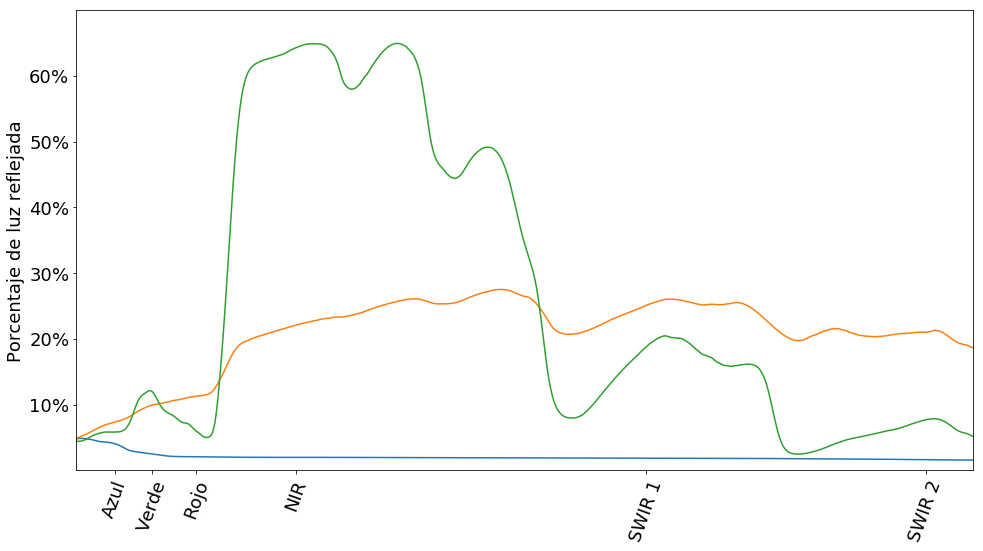

In [87]:
plt.figure(figsize=(14,8))
plt.plot(wlA,refA)
plt.plot(wl,S)
plt.plot(wl,refV)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.482,0.561,0.654,0.865,1.608,2.200],
           ["Azul","Verde","Rojo","NIR", "SWIR 1","SWIR 2"], rotation=70)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10%","20%","30%","40%","50%","60%"])

plt.ylabel("Porcentaje de luz reflejada")
plt.tight_layout()
plt.savefig("fig:spec.png",dpi=300)
plt.show()